### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Let's look at the data types of the columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape
original_number_of_rows = data.shape[0]
original_number_of_rows

12684

The dataset consists of 12684 entries.

2. Investigate the dataset for missing or problematic data.

In [6]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

Car column seems to contain just 0.9% of data and looks irrelevant too. I don't think vehicle type matters in this research. We can drop this column altogether.

Next, we can also drop the other rows which contain NaNs, there's not that many of them.

In [8]:
# Drop 'car' column
data.drop(columns='car', inplace=True)

# Drop the other NaNs
data.dropna(inplace=True)

# Column 'passenger' has a typo. Fix it.
data.rename(columns = {'passanger' : 'passenger'}, inplace=True)

# Convert 'age' column from text to numerical representation for ease of querying and analysis of the Bar attendance. 
data['age'] = data['age'].str.replace('50plus', '51', regex=False)
data['age'] = data['age'].str.replace('below21','20', regex=False)
data['age'] = pd.to_numeric(data['age'])

# Change 'income' string value ranges to numerical identifiers and sorted for easy querying.
data['income'] = data['income'].str.replace('Less than $12500', '1', regex=False)
data['income'] = data['income'].str.replace('$12500 - $24999', '2', regex=False)
data['income'] = data['income'].str.replace('$25000 - $37499', '3', regex=False)
data['income'] = data['income'].str.replace('$37500 - $49999', '4', regex=False)
data['income'] = data['income'].str.replace('$50000 - $62499', '5', regex=False)
data['income'] = data['income'].str.replace('$62500 - $74999', '6', regex=False)
data['income'] = data['income'].str.replace('$75000 - $87499', '7', regex=False)
data['income'] = data['income'].str.replace('$87500 - $99999', '8', regex=False)
data['income'] = data['income'].str.replace('$100000 or More', '9', regex=False)
data['income'] = pd.to_numeric(data['income'])

# Calculate percentage of data remaining after pruning and cleaning of the original data set.
number_of_rows_after_pruning = data.shape[0]
number_of_rows_after_pruning
percent_of_rows_remaining = (number_of_rows_after_pruning / original_number_of_rows) * 100
print('Percent of rows remaining after data cleaning: ', percent_of_rows_remaining)

Percent of rows remaining after data cleaning:  95.23021128981394


> This looks good. After data cleaning we have remaining 95% of the data to work with.

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
number_of_coupons_accepted = data[data['Y'] == 1]['Y'].value_counts()[1]
percent_of_coupons_accepted = (number_of_coupons_accepted / number_of_rows_after_pruning) * 100
print('Percent of drivers who accepted a coupon: ', percent_of_coupons_accepted)

Percent of drivers who accepted a coupon:  56.93352098683666


5. Use a bar plot to visualize the `coupon` column.

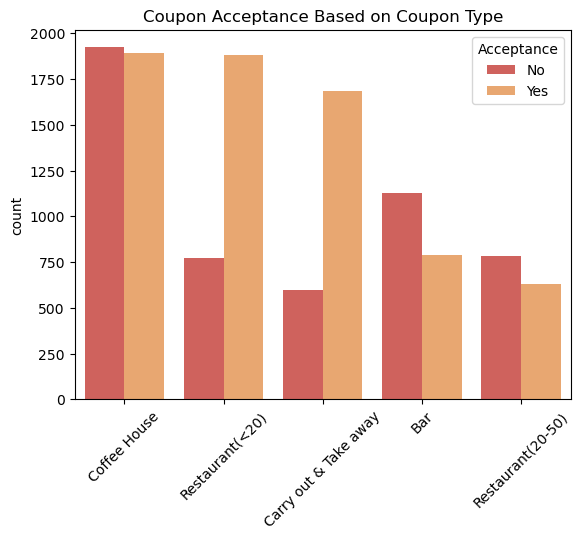

In [10]:
# Set "Spectral" palette for all the plots.
sns.set_palette('Spectral')

# Plot the histogram using countplot() method. Sort descending by count values.
sns.countplot(data, x='coupon', hue='Y', order = data['coupon'].value_counts().index)
plt.title('Coupon Acceptance Based on Coupon Type')
plt.legend(title='Acceptance', labels=['No', 'Yes'])

# Remove unnecessary x-axis label containing column's name and rotate the ticks.
plt.xlabel('')
plt.xticks(rotation=45)
plt.savefig("images/coupon_category_histogram.png")
plt.show()

6. Use a histogram to visualize the temperature column.

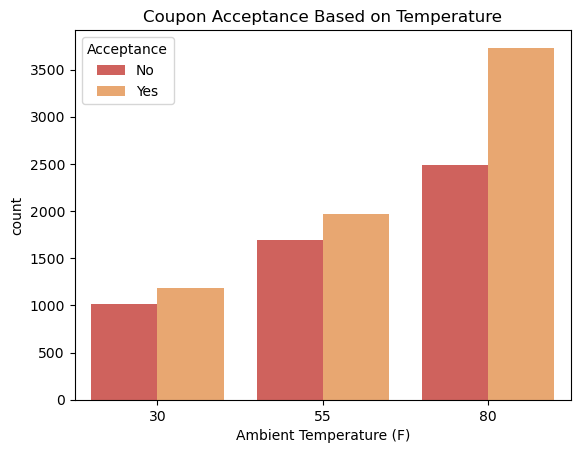

In [11]:
sns.countplot(data, x='temperature', hue='Y')
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.title('Coupon Acceptance Based on Temperature')
plt.xlabel('Ambient Temperature (F)')
plt.savefig("images/temperature_histogram.png")
plt.show()

> Summary
> - Inexpensive restaurants or take outs are the most accepted coupon types. People on the road trip don't have a lot of time to spend at a sit down restaurant.
> - Bars are the most rejected coupons. Who wants to drink while on the road?
> - Drivers in hot climate are more keen to accept the coupon.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
# DF of all drivers who were offered a bar coupon.
received_bar_coupons = data[data['coupon'] == 'Bar']
print(received_bar_coupons.shape)

(1913, 25)


2. What proportion of bar coupons were accepted?


In [13]:
# DF of all people who accepted the bar coupon after the offer.
accepted_bar_coupons = received_bar_coupons[received_bar_coupons['Y'] == 1]
print(accepted_bar_coupons.shape)

# Calculate proportion of people who accepted bar coupons to people who got offered only bar coupons.  
proportion_of_accepted_bar_coupons = (accepted_bar_coupons.shape[0] / received_bar_coupons.shape[0]) * 100
print(proportion_of_accepted_bar_coupons)

# Calculate proportion of people who accepted bar coupons to people who got offered all sort of coupons.  
proportion_of_accepted_bar_coupons_to_all_coupons = (accepted_bar_coupons.shape[0] / number_of_rows_after_pruning) * 100
print(proportion_of_accepted_bar_coupons_to_all_coupons)

(788, 25)
41.19184526921067
6.523718850898254


> Summary
> - Only 41.2% of Bar coupons are accepted.
> - This is only 6.5% of all coupons issued.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# Breakdown of all people in DF by how often they go a bar.
print(data['Bar'].value_counts())

# Breakdown of people by how often they go a bar; and received the bar coupon.
print(received_bar_coupons['Bar'].value_counts())

# Breakdown of people by how often they go a bar; and received the bar coupon; and accepted it.
print(accepted_bar_coupons['Bar'].value_counts())

###

query_lite_drinker = '(Bar == "never") or (Bar == "less1") or (Bar == "1~3")'
query_bar_fly = '(Bar == "4~8") or (Bar == "gt8")'

ldr = received_bar_coupons.query(query_lite_drinker)
lda = accepted_bar_coupons.query(query_lite_drinker)
#print(ldr.shape)
#print(lda.shape)

ld_ratio = (lda.shape[0] / ldr.shape[0]) * 100
print("Ratio of drivers who received and accepted the bar coupon but do not frequently go to bars: ", ld_ratio)

bfr = received_bar_coupons.query(query_bar_fly)
bfa = accepted_bar_coupons.query(query_bar_fly)
#print(bfr.shape)
#print(bfa.shape)

bf_ratio = (bfa.shape[0] / bfr.shape[0]) * 100
print("Ratio of drivers who received and accepted the bar coupon and frequently go to bars: ", bf_ratio)


never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: Bar, dtype: int64
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64
less1    247
1~3      245
never    149
4~8      114
gt8       33
Name: Bar, dtype: int64
Ratio of drivers who received and accepted the bar coupon but do not frequently go to bars:  37.26744186046512
Ratio of drivers who received and accepted the bar coupon and frequently go to bars:  76.16580310880829


> Summary 
> - Interesting indeed. People who often visit bars (4 times or more a month) accepted the Bar Coupon 76% of the time. Where are less bar fly inclined (3 times a month or less) accepted the Bar Coupon only 37% of the time. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
query_go_to_bar_1_times_or_more = '((Bar == "1~3") or (Bar == "4~8") or (Bar == "gt8"))'

over_25_r = received_bar_coupons.query(query_go_to_bar_1_times_or_more).query('(age >= 26)')
print(over_25_r.shape)
over_25_a = over_25_r.query('(Y == 1)')
over_25_ratio = (over_25_a.shape[0] / over_25_r.shape[0]) * 100
print(over_25_ratio)

below_25_r = received_bar_coupons.query(query_go_to_bar_1_times_or_more).query('(age < 26)')
print(below_25_r.shape)
below_25_a = below_25_r.query('(Y == 1)')
below_25_ratio = (below_25_a.shape[0] / below_25_r.shape[0]) * 100
print(below_25_ratio)

(403, 25)
68.98263027295285
(169, 25)
67.45562130177515


> Summary
> - It looks age does not play significant role in accepting the Bar coupon for people who visit a bar at least 1 time a month or more.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
#print(data['passenger'].unique())
#print(data['occupation'].unique())

query_no_kid_passengers = '(passenger != "Kid(s)")'
query_not_farmer_fishing_forestry = '(occupation != "Farming Fishing & Forestry")'

nk_r = received_bar_coupons.query(query_go_to_bar_1_times_or_more).query(query_no_kid_passengers).query(query_not_farmer_fishing_forestry)
nk_a = nk_r.query('(Y == 1)')
nk_ratio = (nk_a.shape[0] / nk_r.shape[0]) * 100
print('Ratio: ', nk_ratio)

Ratio:  70.94339622641509


> Summary
> - Ratio of drivers who received and accepted the bar coupon, have no kid passengers, work in industry other than "Farming, Fishing or Forestry" is 71% 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [17]:
#data['age'].unique()
#print(data['maritalStatus'].unique())
#print(data['RestaurantLessThan20'].unique())

not_widowed_r = received_bar_coupons.query(query_go_to_bar_1_times_or_more).query(query_no_kid_passengers).query('maritalStatus != "Widowed"')
not_widowed_a = not_widowed_r.query('(Y == 1)')
not_widowed_ratio = (not_widowed_a.shape[0] / not_widowed_r.shape[0]) * 100
print('Not widowed: ', not_widowed_ratio)

under30_r = received_bar_coupons.query(query_go_to_bar_1_times_or_more).query('age < 30')
under30_a = under30_r.query('(Y == 1)')
under30_ratio = (under30_a.shape[0] / under30_r.shape[0]) * 100
print('Under 30: ', under30_ratio)

# Income = 4 -> range $37500 - $49999
income_lt_50k_r = received_bar_coupons.query('(RestaurantLessThan20 == "4~8") or (RestaurantLessThan20 == "gt8")').query('income <= 4')
income_lt_50k_a = income_lt_50k_r.query('(Y == 1)')
income_lt_50k_ratio = (income_lt_50k_a.shape[0] / income_lt_50k_r.shape[0]) * 100
print('Income less than 50k: ', income_lt_50k_ratio)

Not widowed:  70.94339622641509
Under 30:  71.95121951219512
Income less than 50k:  45.645645645645644


> Summary
> - Ratio of drivers who received and accepted the bar coupon, have no kid passengers, are not widowed: 71%
> - Ratio of drivers who received and accepted the bar coupon, are under 30: 72%
> - Ratio of drivers who received and accepted the bar coupon, frequently eat at inexpensive resultants, make less than 50k: 46%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

> Response
> - Bar coupons are the least popular coupons. Drinking and driving does not mix well.
> - Drivers who likely accept the Bare coupon:
>   - Have no kids as passengers
>   - Go to Bars more than once a month
>   - Are under 30 years old


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Let's look at the acceptance ratio based on occupation.

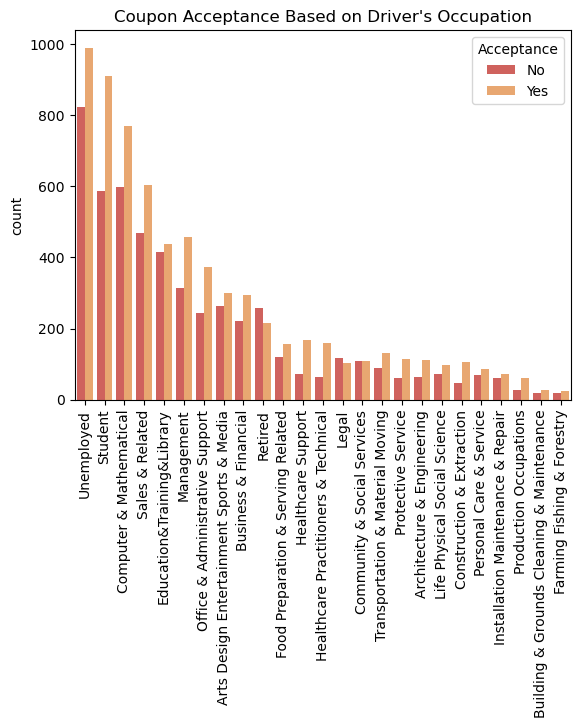

In [18]:
sns.countplot(data, x='occupation', hue='Y', order = data['occupation'].value_counts().index)
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.title("Coupon Acceptance Based on Driver's Occupation")
plt.xlabel('')
plt.xticks(rotation=90)
plt.savefig("images/driver_occupation.png")
plt.show()

> Interesting. We don't have balanced data set sampling all different occupation types. We have a lot of unemployed. Nonetheless, students will most likely accept a coupon.

> On a side, let's calculate unemployment rate in this data set.

In [19]:
un = data.query('occupation == "Unemployed"')
em = data.query('occupation != "Unemployed"')
un_ratio = (un.shape[0] / em.shape[0]) * 100
print('Unemployment rate: ', un_ratio)

Unemployment rate:  17.671699951290794


> 17.6% of unemployment is pretty high. Maybe the data was sampled in a region economically challenged. 

2. Let's explore driver's destination.

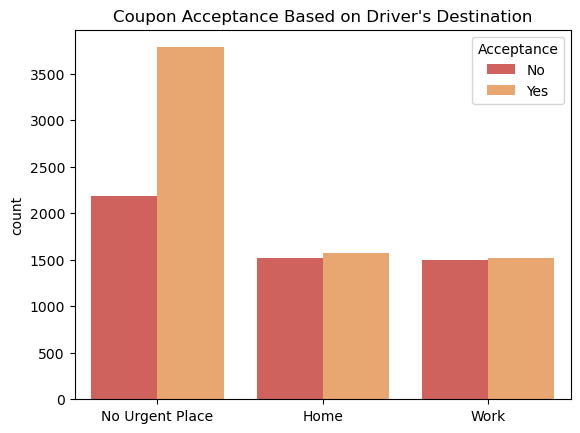

In [20]:
sns.countplot(data, x='destination', hue='Y')
plt.title("Coupon Acceptance Based on Driver's Destination")
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.xlabel('')
plt.savefig("images/driver_destination.png")
plt.show()

> People driving casually are more likely to accept a coupon than people driving back home or for work. Let's explore more those who drive casually.

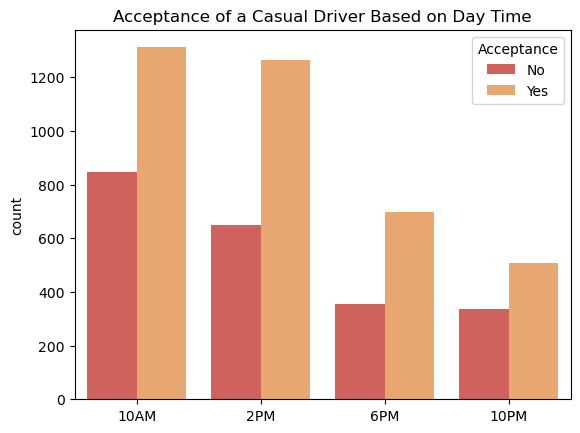

In [21]:
not_urgent = data[data['destination'] == 'No Urgent Place']
sns.countplot(not_urgent, x='time', hue='Y', order = not_urgent['time'].value_counts().index)
plt.title("Acceptance of a Casual Driver Based on Day Time")
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.xlabel('')
plt.savefig("images/driver_casual_driving_time.png")
plt.show()


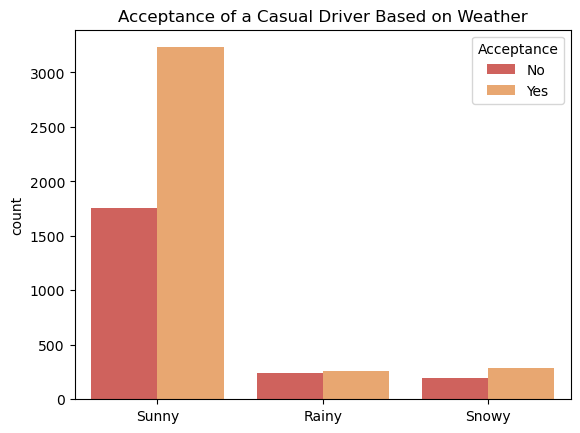

In [22]:
sns.countplot(not_urgent, x='weather', hue='Y', order = not_urgent['weather'].value_counts().index)
plt.title("Acceptance of a Casual Driver Based on Weather")
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.xlabel('')
plt.savefig("images/driver_casual_driving_weather.png")
plt.show()

> Summary of causal drivers:
> - They will most likely accept a coupon between 10am and 6pm.
> - They will most likely accept a coupon on a sunny day.